In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import ROOT
import datetime
from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial
plt.rcParams.update({'font.size': 16})

In [2]:
f = ROOT.TFile('showerselection.root')
t = f.Get('_tree')
df = pd.DataFrame(tree2rec(t,branches=['_pi0_energy','_clus_nhits_v','_clus_vtxdist_v','_clus_plane_v']))

/Users/ah673/Library/Python/2.7/lib/python/site-packages/root_numpy/_tree.py:423: DeprecationWarning: tree2rec is deprecated and will be removed in 5.0.0. Instead use tree2array(...).view(np.recarray)
  DeprecationWarning)


TypeError: tree must be a ROOT.TTree

In [ ]:
def Nclusters(x,radmax=100,nhitsmax=100):
    clus_nhits   = x['_clus_nhits_v']
    clus_vtxdist = x['_clus_vtxdist_v']
    clus_plane   = x['_clus_plane_v']
    nclus = 0
    ntot  = 0
    for i in xrange(len(clus_plane)):
        if (clus_plane[i] != 2 ):
            continue
        ntot += 1
        nhits = clus_nhits[i]
        vtxd  = np.sqrt(clus_vtxdist[i])
        if (vtxd < radmax and nhits < nhitsmax and nhits > 3):
            nclus += 1
    #if (ntot == 0): return -1
    return nclus#/float(ntot)

In [72]:
df['nclus'] = df.apply(lambda x : Nclusters(x,radmax=100,nhitsmax=30), axis=1)

In [82]:
df_pi0 = df.query('_pi0_energy > .20')
print 'Pi0 sample : ',df_pi0.shape
df_trk = df.query('_pi0_energy < .20')
print 'Trk sample : ',df_trk.shape

Pi0 sample :  (6004, 5)
Trk sample :  (53921, 5)


6004
53921


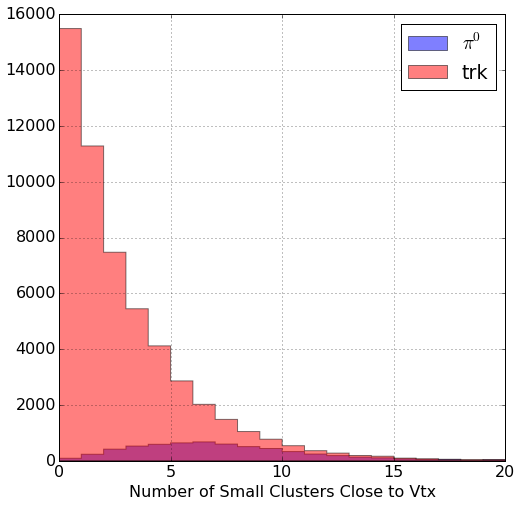

In [87]:
fig = plt.figure(figsize=(8,8))

nclus_pi0 = df_pi0['nclus'].values
nclus_trk = df_trk['nclus'].values

print len(nclus_pi0)
print len(nclus_trk)

NMAX = 20

BINS = np.linspace(0,NMAX,NMAX+1)
#BINS = np.linspace(0,0.5,NMAX+1)

NORM = False

plt.hist(nclus_pi0,bins=BINS,histtype='stepfilled',alpha=0.5,color='b',label='$\pi^0$',normed=NORM)
plt.hist(nclus_trk,bins=BINS,histtype='stepfilled',alpha=0.5,color='r',label='trk',normed=NORM)

plt.xlabel('Number of Small Clusters Close to Vtx')
plt.grid()
#plt.yscale('log')
plt.legend()
plt.show()